In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,plot_confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
df_hungarian = pd.read_csv('/content/drive/MyDrive/datasets/processed.hungarian.data', header = None)
df_switzerland = pd.read_csv('/content/drive/MyDrive/datasets/processed.switzerland.data', header = None)
df_cleveland = pd.read_csv('/content/drive/MyDrive/datasets/processed.cleveland.data', header = None)

df1 = pd.concat([df_hungarian, df_switzerland], ignore_index=True)
df = pd.concat([ df1, df_cleveland],ignore_index=True)

df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,28.0,1.0,2.0,130,132,0,2,185,0,0.0,?,?,?,0
1,29.0,1.0,2.0,120,243,0,0,160,0,0.0,?,?,?,0
2,29.0,1.0,2.0,140,?,0,0,170,0,0.0,?,?,?,0
3,30.0,0.0,1.0,170,237,0,1,170,0,0.0,?,?,6,0
4,31.0,0.0,2.0,100,219,0,1,150,0,0.0,?,?,?,0


In [ ]:
df.shape

(720, 14)


The feature names and their meanings are:

0. age: age in years

1. sex: sex (1 = male; 0 = female)

2. cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

3. trestbps: resting blood pressure (in mm Hg on admission to the hospital)

4. chol: serum cholestoral in mg/dl

5. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

6. restecg: resting electrocardiographic results
-- Value 0: normal

-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

7. thalach: maximum heart rate achieved

8. exang: exercise induced angina (1 = yes; 0 = no)

9. oldpeak = ST depression induced by exercise relative to rest

10. slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping

11. ca: number of major vessels (0-3) colored by flourosopy

12. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label

  Target:
13.  condition: 0 = no disease, 1 = disease


# **Data Pre-processing and cleaning**

1. Change the feature name to make it more convenient to understand.

2. Remove null values

3. Check the unique values of the dataframe and see if it matches the dataset description

4. Check datatype

In [ ]:
df.columns = ['age',
           'sex',
           'chestPainType',
           'atRestBps', 
           'cholestrol', 
           'fastingBloodSugar',
           'atrestEcg', 
           'maxHeartRate', 
           'excerciseInducedangina',
           'oldpeak' , 
           'Slope',
           'ca',
           'thal', 
           'heartDisease']

In [ ]:
df.head()

,age,sex,chestPainType,atRestBps,cholestrol,fastingBloodSugar,atrestEcg,maxHeartRate,excerciseInducedangina,oldpeak,Slope,ca,thal,heartDisease
0,28.0,1.0,2.0,130,132,0,2,185,0,0.0,?,?,?,0
1,29.0,1.0,2.0,120,243,0,0,160,0,0.0,?,?,?,0
2,29.0,1.0,2.0,140,?,0,0,170,0,0.0,?,?,?,0
3,30.0,0.0,1.0,170,237,0,1,170,0,0.0,?,?,6,0
4,31.0,0.0,2.0,100,219,0,1,150,0,0.0,?,?,?,0


In [ ]:
df['heartDisease'].unique()

array([0, 1, 3, 2, 4])

In [ ]:
df['heartDisease'] = np.where(df['heartDisease'] > 0, 1,0)
df['heartDisease'].unique()

array([0, 1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     720 non-null    float64
 1   sex                     720 non-null    float64
 2   chestPainType           720 non-null    float64
 3   atRestBps               720 non-null    object 
 4   cholestrol              720 non-null    object 
 5   fastingBloodSugar       720 non-null    object 
 6   atrestEcg               720 non-null    object 
 7   maxHeartRate            720 non-null    object 
 8   excerciseInducedangina  720 non-null    object 
 9   oldpeak                 720 non-null    object 
 10  Slope                   720 non-null    object 
 11  ca                      720 non-null    object 
 12  thal                    720 non-null    object 
 13  heartDisease            720 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory

**Null Values**



In [ ]:
df = df.replace('?', np.NaN)

In [ ]:
df.isnull().sum() * 100 / len(df)

age                        0.000000
sex                        0.000000
chestPainType              0.000000
atRestBps                  0.416667
cholestrol                 3.194444
fastingBloodSugar         11.527778
atrestEcg                  0.277778
maxHeartRate               0.277778
excerciseInducedangina     0.277778
oldpeak                    0.833333
Slope                     28.750000
ca                        57.361111
thal                      44.444444
heartDisease               0.000000
dtype: float64

Around 45+ percent of ca and thal are null so drop this columns. 

Rows of the columns which make only 3% of the dataframe altogether are also removed. The rows which had two or more null values where also removed.

The remaining missing values will be dealt with KNN imputer after EDA.


In [ ]:
df.drop(['ca', 'thal'], axis = 1, inplace= True)

In [ ]:
df.dropna(subset = ['cholestrol', 'atRestBps',  'atrestEcg', 'maxHeartRate', 'excerciseInducedangina', 'oldpeak'], inplace = True)

In [ ]:
df.dropna(thresh=2, inplace = True)

In [ ]:
df.shape

(688, 12)

In [ ]:
imputer = KNNImputer(n_neighbors=3)
df_filled = imputer.fit_transform(df[['oldpeak', 'Slope', 'heartDisease']])

In [ ]:
df_filled= pd.DataFrame(df_filled)
df_filled.columns = ['oldpeak', 'slope', 'heartDisease']
df_filled.drop(['oldpeak', 'heartDisease'], inplace = True, axis = 1)

In [ ]:
df_filled['slope'].unique()

array([1.33333333, 2.        , 1.        , 3.        ])

In [ ]:
df_filled['slope'] = np.where(df_filled['slope'] < 2, 1, df_filled['slope'])

In [ ]:
df_filled

,slope
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
683,2.0
684,2.0
685,2.0
686,2.0


In [ ]:
df = pd.concat([df.reset_index(drop=True), df_filled.reset_index(drop=True)], axis=1)

In [ ]:
df = df.drop(['Slope'], axis = 1)
df

,age,sex,chestPainType,atRestBps,cholestrol,fastingBloodSugar,atrestEcg,maxHeartRate,excerciseInducedangina,oldpeak,heartDisease,slope
0,28.0,1.0,2.0,130,132,0,2,185,0,0.0,0,1.0
1,29.0,1.0,2.0,120,243,0,0,160,0,0.0,0,1.0
2,30.0,0.0,1.0,170,237,0,1,170,0,0.0,0,1.0
3,31.0,0.0,2.0,100,219,0,1,150,0,0.0,0,1.0
4,32.0,0.0,2.0,105,198,0,0,165,0,0.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
683,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,1,2.0
684,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,1,2.0
685,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,1,2.0
686,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,1,2.0


In [ ]:
df.isnull().sum()

age                        0
sex                        0
chestPainType              0
atRestBps                  0
cholestrol                 0
fastingBloodSugar         78
atrestEcg                  0
maxHeartRate               0
excerciseInducedangina     0
oldpeak                    0
heartDisease               0
slope                      0
dtype: int64

In [ ]:
unique = []
for col in df:
  uni = df[col].nunique()
  unique.append([col, uni])

unique

[['age', 49],
 ['sex', 2],
 ['chestPainType', 4],
 ['atRestBps', 85],
 ['cholestrol', 306],
 ['fastingBloodSugar', 4],
 ['atrestEcg', 6],
 ['maxHeartRate', 185],
 ['excerciseInducedangina', 4],
 ['oldpeak', 76],
 ['heartDisease', 2],
 ['slope', 3]]

In [ ]:
df.dtypes

age                       float64
sex                       float64
chestPainType             float64
atRestBps                  object
cholestrol                 object
fastingBloodSugar          object
atrestEcg                  object
maxHeartRate               object
excerciseInducedangina     object
oldpeak                    object
heartDisease                int64
slope                     float64
dtype: object

FastingBloodSugar should have 2(3 for null) values but has 4

atrestEcg should have 3 values but has 6

excerciseInducedangina should have 2 values but has 4

slope should have 3(4 for null) values but has 6

This due to the combination of 3 datasets, each has its own way of representing the same value. So, a common form is established.

Also, even though they are all numerical values, datatype is object. This is to be changed



In [ ]:
for col in df:
  df[col] = np.where(df[col] == '0', 0, df[col])
  df[col] = np.where(df[col] == '1', 1, df[col])
  df[col] = np.where(df[col] == '2', 2, df[col])
  df[col] = np.where(df[col] == '3', 3, df[col])


In [ ]:
unique = []
for col in df[['fastingBloodSugar', 'atrestEcg', 'excerciseInducedangina', 'slope']]:
  uni = df[col].unique()
  unique.append([col, uni])

unique

[['fastingBloodSugar', array([0, nan, 1], dtype=object)],
 ['atrestEcg', array([2, 0, 1], dtype=object)],
 ['excerciseInducedangina', array([0, 1], dtype=object)],
 ['slope', array([1., 2., 3.])]]

In [ ]:
df[['age','sex','chestPainType','atRestBps','cholestrol', 'atrestEcg', 'maxHeartRate', 'excerciseInducedangina','oldpeak','heartDisease', 'slope', 'fastingBloodSugar']]  = df[['age','sex','chestPainType','atRestBps','cholestrol', 'atrestEcg', 'maxHeartRate', 'excerciseInducedangina','oldpeak','heartDisease', 'slope', 'fastingBloodSugar']].apply(pd.to_numeric)

# **Outlier Detection, Feature selection**

In [ ]:
df.head()

,age,sex,chestPainType,atRestBps,cholestrol,fastingBloodSugar,atrestEcg,maxHeartRate,excerciseInducedangina,oldpeak,heartDisease,slope
0,28.0,1.0,2.0,130.0,132.0,0.0,2,185.0,0,0.0,0,1.0
1,29.0,1.0,2.0,120.0,243.0,0.0,0,160.0,0,0.0,0,1.0
2,30.0,0.0,1.0,170.0,237.0,0.0,1,170.0,0,0.0,0,1.0
3,31.0,0.0,2.0,100.0,219.0,0.0,1,150.0,0,0.0,0,1.0
4,32.0,0.0,2.0,105.0,198.0,0.0,0,165.0,0,0.0,0,1.0


In [ ]:
def iqr_capping(df, cols):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        ub = q3 + (1.5*iqr)
        lb = q1 - (1.5*iqr)

        df[col] = np.where(df[col]>ub, ub,
                        np.where(df[col]<lb, lb, df[col]))
  

In [ ]:
features = ['age', 'atRestBps', 'cholestrol', 'maxHeartRate']
iqr_capping(df,features)

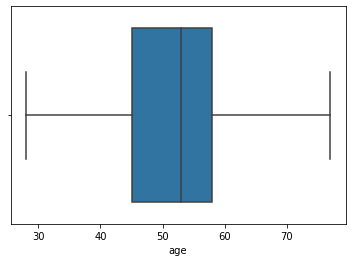

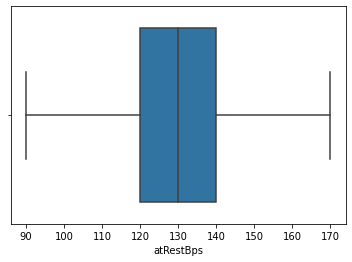

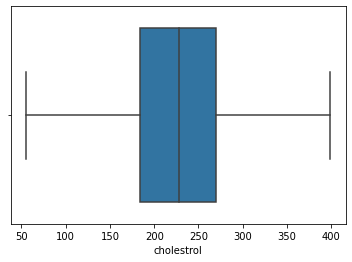

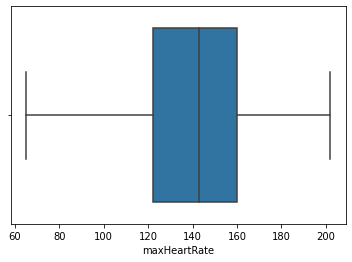

In [ ]:
for col in df[['age', 'atRestBps', 'cholestrol','maxHeartRate']]:
  sns.boxplot( data = df, x = df[col])
  plt.show()


In [ ]:
df.drop(['fastingBloodSugar', 'atrestEcg'], axis = 1, inplace = True)

In [ ]:
df.head()

,age,sex,chestPainType,atRestBps,cholestrol,maxHeartRate,excerciseInducedangina,oldpeak,heartDisease,slope
0,28.0,1.0,2.0,130.0,132.0,185.0,0,0.0,0,1.0
1,29.0,1.0,2.0,120.0,243.0,160.0,0,0.0,0,1.0
2,30.0,0.0,1.0,170.0,237.0,170.0,0,0.0,0,1.0
3,31.0,0.0,2.0,100.0,219.0,150.0,0,0.0,0,1.0
4,32.0,0.0,2.0,105.0,198.0,165.0,0,0.0,0,1.0


# Train test split

In [ ]:
X = df.drop(['heartDisease'], axis = 1)
y = df['heartDisease']

# ***Final Model***

In [ ]:
model = RandomForestClassifier( max_features = 'log2', max_samples = 404, n_estimators= 20, n_jobs = -1)
model.fit(X, y)

RandomForestClassifier(max_features='log2', max_samples=404, n_estimators=20,
                       n_jobs=-1)

In [ ]:
import joblib

In [ ]:
joblib.dump(model,'cardio_deployment.joblib')

['cardio_deployment.joblib']



> KNN



In [ ]:
KNN_parameters = {
    'n_neighbors' : [ 3, 4, 5, 6, 8, 9, 10 ]
}

KNN_gridsearchcv = GridSearchCV(KNeighborsClassifier(), KNN_parameters)
KNN_gridsearchcv.fit(X_train, y_train)

KNN_model = KNN_gridsearchcv.best_estimator_
KNN_ypred = KNN_model.predict(X_test) 

In [ ]:
accuracy_score( y_test, KNN_ypred)

0.8081395348837209

In [ ]:
KNN_gridsearchcv.best_params_

{'n_neighbors': 8}



> Decision Tree



In [ ]:
model = DecisionTreeClassifier(random_state = 4)
path = model.cost_complexity_pruning_path(X_train,y_train) #determines values of alpha
ccp_alphas = path.ccp_alphas #extract the values of alpha
ccp_alphas = ccp_alphas[ :-1] #removes the highest value of alpha cause this will prune all leaves

ccp_alphas 


array([0.        , 0.00123326, 0.00128131, 0.00155039, 0.00169574,
       0.001716  , 0.00172265, 0.00177649, 0.00183599, 0.00184989,
       0.00185724, 0.00189248, 0.00206718, 0.00226098, 0.00229687,
       0.00237403, 0.00258398, 0.00271318, 0.00274548, 0.00286178,
       0.00290698, 0.00300636, 0.00303761, 0.00335917, 0.00337807,
       0.00341731, 0.00349583, 0.00352856, 0.00371447, 0.00378633,
       0.00387829, 0.00413437, 0.00424038, 0.00481018, 0.00570476,
       0.00597097, 0.00715564, 0.00884885, 0.01123827, 0.01124831,
       0.01183657, 0.01455529, 0.0275091 , 0.05488824])

In [ ]:
DT_parameters = {
    'ccp_alpha' : ccp_alphas,
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['sqrt', 'log2'],
    'splitter' : ['best','random']

    }

DT_gridsearchcv = GridSearchCV(DecisionTreeClassifier( random_state = 4), DT_parameters, n_jobs = -1)
DT_gridsearchcv.fit(X_train, y_train)

DT_model = DT_gridsearchcv.best_estimator_
DT_ypred = DT_model.predict(X_test) 

In [ ]:
accuracy_score(DT_ypred,y_test)

0.7906976744186046

In [ ]:
DT_gridsearchcv.best_params_

{'ccp_alpha': 0.008848852529337863,
 'max_depth': 6,
 'max_features': 'sqrt',
 'splitter': 'best'}



> **Random Forest**



In [ ]:
RF_Parameters = {
               'n_estimators' : range( 10, 80, 5),               
               'max_samples' : range(344, 510, 20),
               'max_features' : ['sqrt', 'log2','None'],
                }


RF_gridsearchcv = GridSearchCV(RandomForestClassifier(ccp_alpha = 0.008848852529337863, max_depth = 6, n_jobs = -1), RF_Parameters)
RF_gridsearchcv.fit(X_train, y_train)

RF_model = RF_gridsearchcv.best_estimator_
RF_ypred = RF_model.predict(X_test)

In [ ]:
accuracy_score(RF_ypred,y_test)

0.8313953488372093

In [ ]:
RF_gridsearchcv.best_params_

{'max_features': 'log2', 'max_samples': 404, 'n_estimators': 20}

In [ ]:
data = {         
           'KNN': KNN_ypred, 
           'DECISION TREE' : DT_ypred,
           'RANDOM FOREST' : RF_ypred, 
}

models = pd.DataFrame(data) 

model_results = pd.DataFrame(columns = ['Model', 'Accuracy','Precision', 'Recall', 'F1 Score','ROC'])
    
 
for column in models:
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    results =pd.DataFrame([[column,acc, prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Precision', 'Recall', 'F1 Score','ROC'])
    model_results = model_results.append(results, ignore_index = True)

model_results


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,KNN,0.808140,0.819277,0.790698,0.804734,0.808140
1,DECISION TREE,0.790698,0.784091,0.802326,0.793103,0.790698
2,RANDOM FOREST,0.831395,0.793814,0.895349,0.841530,0.831395


In [ ]:
X.head()

,age,sex,chestPainType,atRestBps,cholestrol,maxHeartRate,excerciseInducedangina,oldpeak,slope
0,28.0,1.0,2.0,130.0,132.0,185.0,0,0.0,1.0
1,29.0,1.0,2.0,120.0,243.0,160.0,0,0.0,1.0
2,30.0,0.0,1.0,170.0,237.0,170.0,0,0.0,1.0
3,31.0,0.0,2.0,100.0,219.0,150.0,0,0.0,1.0
4,32.0,0.0,2.0,105.0,198.0,165.0,0,0.0,1.0
